## Gaussian Mixture Model (GMM)

In [2]:
import sys
sys.path.append('../lib')

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from mixture_model import *

%load_ext autoreload
%autoreload 2
%matplotlib inline 

### Test GMM with synthetic data 

#### Generate data from a mixture of Gaussians 

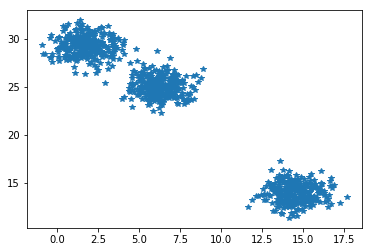

In [3]:
K = 3
n_data = 300
means_true = np.random.rand(K,2)*30
covs_true = np.array([np.eye(2)]*K)

data = []
for i in range(K):
    data.append(mvn(mean=means_true[i], cov = covs_true[i]).rvs(n_data))
data = np.concatenate(data)
plt.plot(data[:,0], data[:,1],'*')

#### Estimate GMM based on the data 

[1.0, 1.0, 1.0]


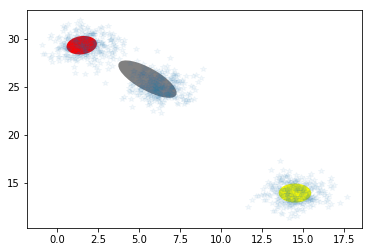

In [4]:
gmm = GMM(D = 2, K = 3)

gmm.fit(data,init_type = 'random', max_iter=10, threshold=1e-6, n_init = 5)
clear_output()

#plot the mixture components
colors = [[1.,0.,0.],[1.,1.,0.],[0.5,0.5,0.5]]
fig,ax = plt.subplots()
plt.plot(data[:,0], data[:,1],'*', alpha=0.05)
plot_GMM(gmm.means_, gmm.covariances_,ax,colors=colors)
#plt.axis([-0,30,-0,30])

***

### Applying GMM to the letter data 

#### Declare Variables 

In [5]:
n_states = 5 #number of states in the GMM
n_in = 1 #Number of variables for the radial basis function [s] (decay term)
n_out = 2 # Number of motion variables [xi,x2]

n_data = 200 #length of trajectory
n_samples = 5 #number of demonstrations

#### Load Data 

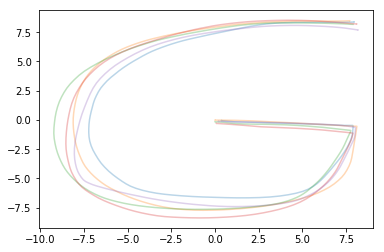

In [7]:
ROOT = '../python_data/2Dletters/'
data = np.load(ROOT + 'G.npy')[1:n_samples+1]

#construct the output Y by concatenating all demonstrations
data = data.transpose([0,2,1])
Y = np.concatenate(data,axis=0)

for data_i in data:
    plt.plot(data_i[:,0], data_i[:,1],'-', alpha=0.3)

#### Estimate GMM from the concatenated data [s_in, x_targets]

In [8]:
gmm = GMM(K = n_states,D = n_out)
gmm.fit(Y)
clear_output()

#### Plot the estimated mixture components 

[1.0, 1.0, 1.0, 1.0, 1.0]


[-10, 10, -10, 10]

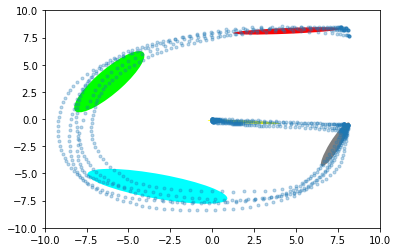

In [9]:
fig,ax = plt.subplots()
plt.plot(Y[:,0], Y[:,1], '.', alpha=0.3)
colors = [[1.,0.,0.],[1.,1.,0.],[0.5,0.5,0.5],[0.,1.,1.],[0.,1.,0.],[0.,0.,1.],]
plot_GMM(gmm.means_[:,:2], gmm.covariances_[:,:2,:2],ax, colors = colors)
plt.axis([-10,10,-10,10])